# Домашнее задание 1
В этом домашнем задании мы предлагаем вам решить задачу регрессии.

### В задаче регрессии:
вы обучите разные модели отдельно на двух наборах данных и сравните их производительность (MAPE, $R^2$).

$$ 
    MAPE(y, \hat{y})
        = \frac1{m} \sum_{i=1}^m
            \frac{\lvert y_i - \hat{y}_i \rvert}{\lvert y_i \rvert}
\,.$$


$$
    R^2(y, \hat{y})
        = 1- \frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
\,. $$


Мы будем использовать два набора данных:

1) Количество пассажиров авиакомпаний в 60-х (простой)
2) Набор данных электрических трансформаторов (ETT) (сложный)

Нам нужен простой набор данных, чтобы убедиться, что наша модель работает правильно и может быть применена к сложному набору данных.



### Максимальное количество баллов: **50 баллов**
### Проходной порог: **25 баллов**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [ ]:
# Number of airlines passengers in 60's
!curl https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv --output ./airline-passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2180  100  2180    0     0  21372      0 --:--:-- --:--:-- --:--:-- 21372


In [ ]:
# # Electricity Transformer Dataset (ETT)
!git clone https://github.com/zhouhaoyi/ETDataset.git

Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159
Receiving objects: 100% (187/187), 3.86 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (62/62), done.


# Разведочный анализ данных EDA, **max 8 баллов.**




1)  Загрузите данные и выведите на экран первые 15 строк таблиц, **1 б.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read & plot air passengers dataset 
air_passangers_path = './airline-passengers.csv'
data_air = pd.read_csv(air_passangers_path)
data_air['Month'] = pd.to_datetime(data_air['Month'])
data_air = data_air.set_index("Month")
data_air.head(15)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


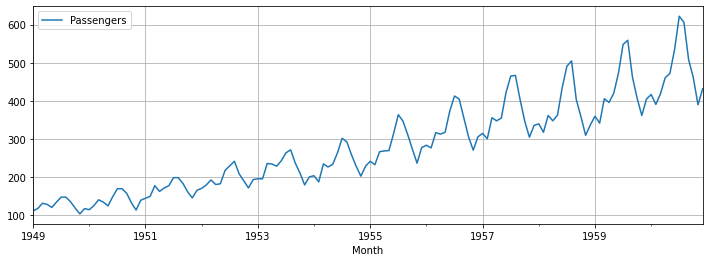

In [ ]:
data_air.plot(figsize=(12, 4))
plt.grid(which="major", axis="both")

In [ ]:
# read & plot ett dataset 
ett_path = './ETDataset/ETT-small/ETTh1.csv'
data_ett = pd.read_csv(ett_path)
data_ett['date'] = pd.to_datetime(data_ett['date'])
data_ett = data_ett.set_index("date")
data_ett.head(15)


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000


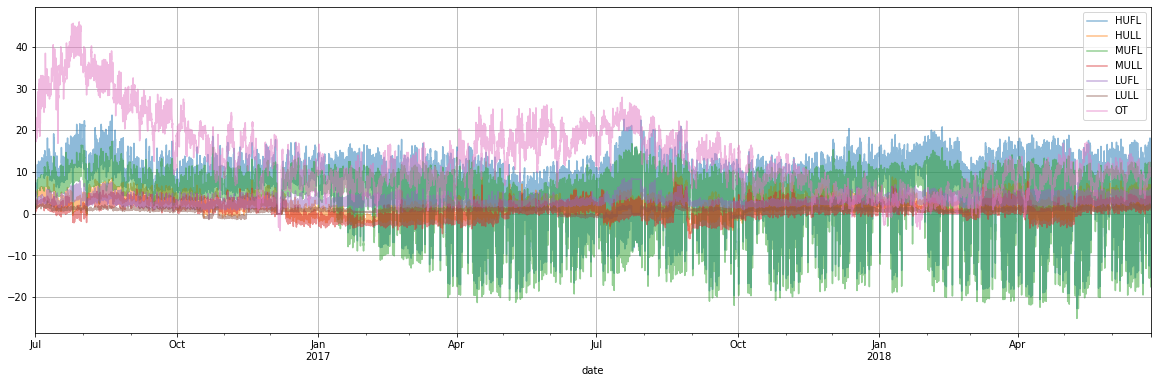

In [ ]:
data_ett.plot(figsize=(20, 6), alpha=0.5)
plt.grid(which="major", axis="both")

3) Сглаживание данных, **2 б.**

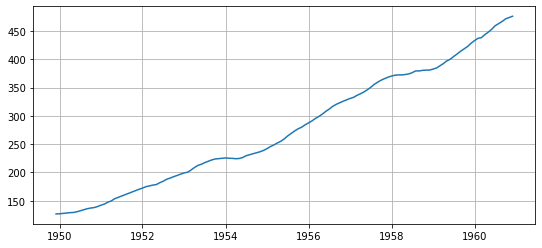

In [ ]:
# smoothing air passengers dataset 
fig, axes = plt.subplots(1,1, figsize=(9,4))
axes.plot(data_air['Passengers'].rolling(12).mean())
plt.grid(which="major", axis="both")
plt.show()

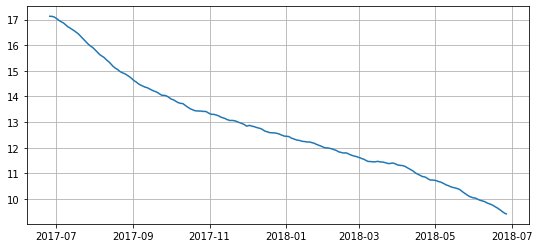

In [ ]:
# smoothing ett dataset
fig, axes = plt.subplots(1,1, figsize=(9,4))
axes.plot(data_ett['OT'].rolling(8640).mean())
plt.grid(which="major", axis="both")
plt.show()


4) Отрисуйте график автокорреляции, **2 б.**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

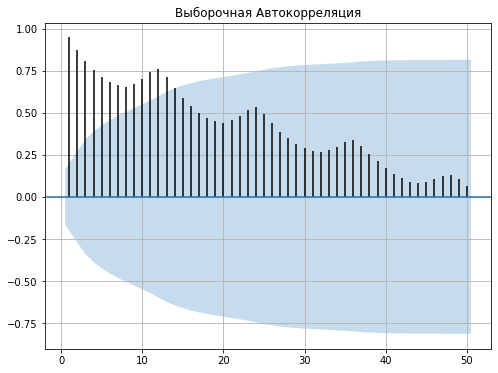

In [ ]:
# autocorrelation curve air passengers dataset
fig, ax = plt.subplots(figsize=(8, 6))
plot_acf(data_air, ax, lags=50, zero=False, alpha=0.05,
         title="Выборочная Автокорреляция", marker=None)
ax.grid()
plt.show()

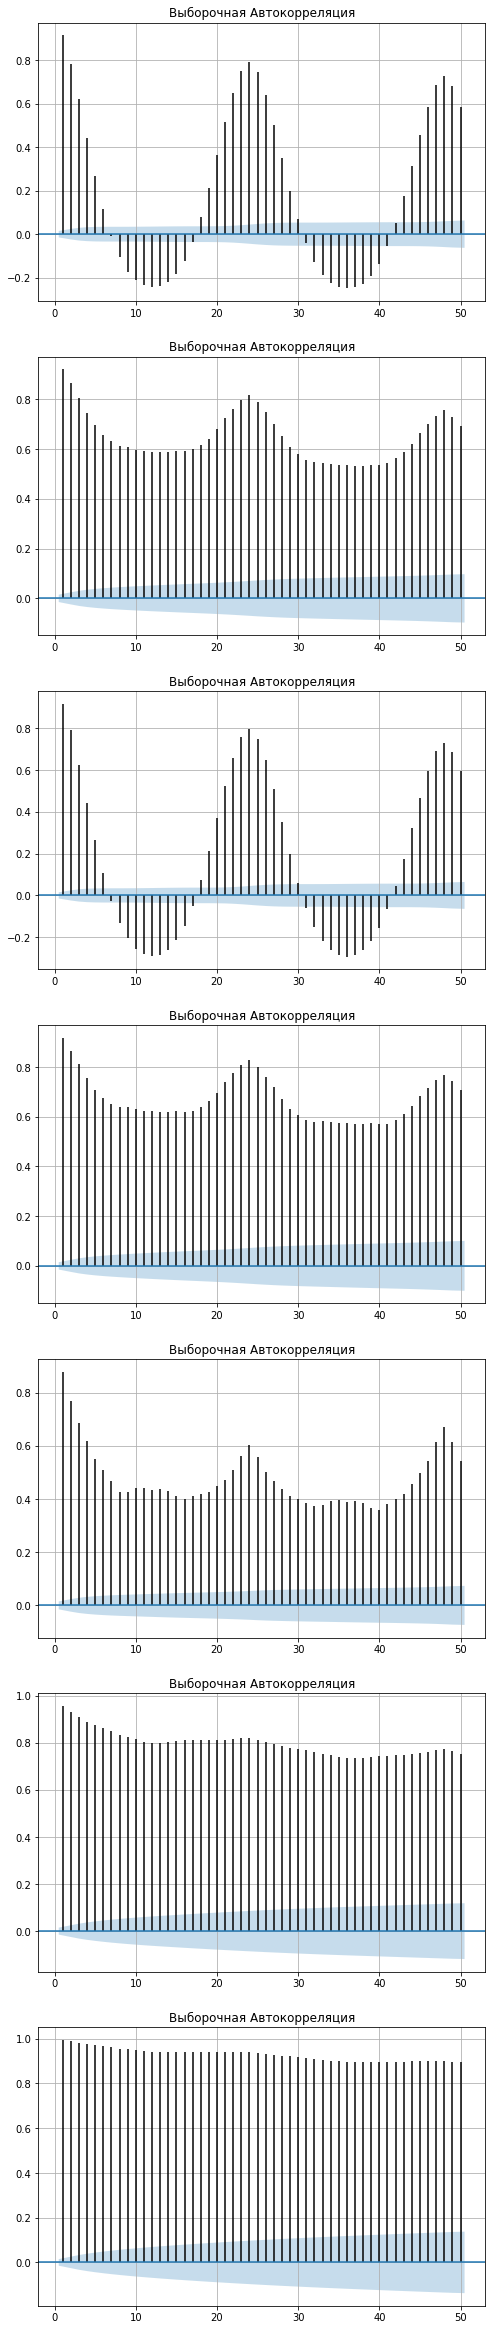

In [ ]:
# autocorrelation curve ett dataset 
fig, axs = plt.subplots(data_ett.shape[1], 1, figsize=(8, data_ett.shape[1] * 6))
for i in range(data_ett.shape[1]):
    plot_acf(data_ett.iloc[:, i], axs[i], lags=50, zero=False, alpha=0.05,
          title="Выборочная Автокорреляция", marker=None)
    axs[i].grid()
plt.show()


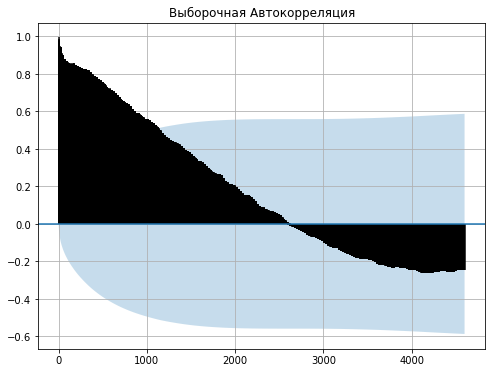

In [ ]:
# autocorrelation curve ett dataset smoothed
fig, ax = plt.subplots(figsize=(8, 6))
plot_acf(data_ett.iloc[:, -1], ax, lags=4600, zero=False, alpha=0.05,
         title="Выборочная Автокорреляция", marker=None)
ax.grid()
plt.show()

5) Оцените период сезонности на основе кривой полной автокорреляции, **3 б.**

In [ ]:
# seasonality air passengers dataset 
season_air = 12 # 12 месяцев

In [ ]:
# seasonality ett dataset
season_ett = 24 # 24 часа

In [ ]:
# помимо дневной сезонности в данных ett присутствует еще и годовая сезонность
# seasonality ett dataset smoothed
season_ett_smoothed = 365 # 365 дней

# Подготовьте данные к обучению, **4 б.**


1) Разделите выборку на обучающую и тестовую, **2 pt.**


In [ ]:
X_train_air = data_air[:'1957-01'].index
Y_train_air = data_air[:'1957-01']

X_test_air = data_air['1957-02':].index
Y_test_air = data_air['1957-02':]

# будем делать прогноз для сглаженных данных, чтобы уменьшить размерность
X_train_ett = data_ett[:'2017-12-31 23:00:00'].index
Y_train_ett = data_ett.loc[:'2017-12-31 23:00:00', ['OT']]

X_test_ett = data_ett['2018-01-01 00:00:00':].index
Y_test_ett = data_ett.loc['2018-01-01 00:00:00':, ['OT']]

2) Normalize data using `MinMaxScaler` or `StandartScaler`, **2 pt.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler_air = Pipeline([
    # ("Масштабирование", StandardScaler(),),
    ("Масштабирование", MinMaxScaler(),),
    ])

scaler_ett = Pipeline([
    # ("Масштабирование", StandardScaler(),),
    ("Масштабирование", MinMaxScaler(),),
    ])

In [ ]:
# normalize air passengers dataset
scaler_air.fit(data_air)
Y_train_air_scale = pd.DataFrame(scaler_air.transform(Y_train_air), index=Y_train_air.index, columns=Y_train_air.columns)
Y_test_air_scale = pd.DataFrame(scaler_air.transform(Y_test_air), index=Y_test_air.index, columns=Y_test_air.columns)

In [ ]:
# normalize ett dataset
scaler_ett.fit(data_ett.loc[:, ['OT']])
Y_train_ett_scale = pd.DataFrame(scaler_ett.transform(Y_train_ett), index=Y_train_ett.index, columns=Y_train_ett.columns)
Y_test_ett_scale = pd.DataFrame(scaler_ett.transform(Y_test_ett), index=Y_test_ett.index, columns=Y_test_ett.columns)

# Разбор ARIMA

**1) Преподготовка**

Если ряд имеет растущий var со времени - можно применить:

a) Логарифмирование (см. дальше - не взлетает)

б) Разложнение на тренд, сезонность и ошибку по multiplicative схеме, а не по аддитивной. Далее ARIMA использовать на сезонности, а на тренд исп линейную регр (см. дальше - не взлетело, лучше АРИМУ на всем ряде)

в) Box-cox Transformation of non-normal data, чтобы сделать нормальное распределение

**2) Остационаривание**

Для применения стат моделей необходимо остационарить ряд (все алгосы в машинном обучении работают при предположении что стат параметры неизменны с течением времени (на всей выборке)).

**преподготовка позволяет легче найти праметр d в модели ARIMA(p,d,q) - он нужен чтобы заменить предсказание ряда на предсказания по ряду разности**


- p — порядок компоненты AR (auto-regressive)
- d — порядок интегрированного ряда (порядок разности временного ряда)
- q — порядок компонетны MA (moving average)

Находим d и проводи тест Дики-Фуллера на стационарность

Далее находим p, q:
для их определения нам надо изучить авторкорреляционную (ACF) и частично автокорреляционную (PACF) функции для ряда первых разностей.
ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA
PACF поможет нам определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.  


**3) ARIMA на стационарном ряде**

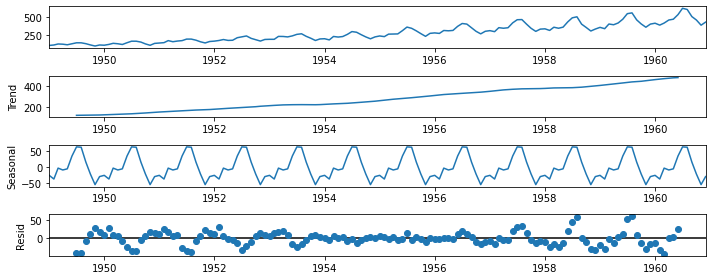

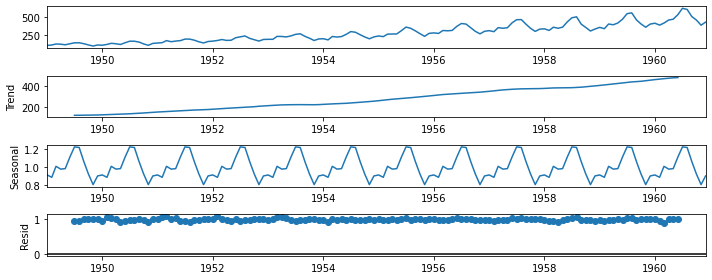

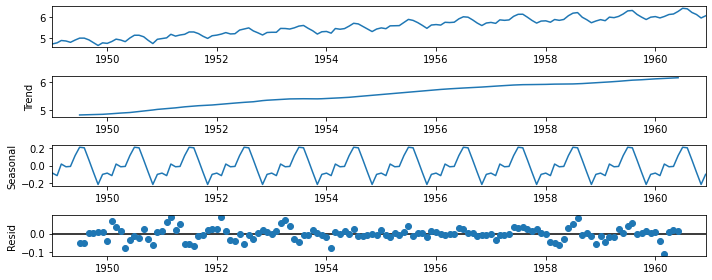

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# **Аддитивная модель** 
# $${Y_t} = t (trend) + s (seasonality) + r (residual)$$
decompose_data = seasonal_decompose(data_air, model="additive")
plt.rc("figure",figsize=(10,4))
decompose_data.plot();
# **Мультипликативная модель** 
# $${Y_t} = t (trend) * s (seasonality) * r (residual)$$
decompose_data = seasonal_decompose(data_air, model="multiplicative")
decompose_data.plot();
### логарифм
data_air_log=data_air.copy()
data_air_log['Passengers']=np.log(data_air_log['Passengers'].values)
decompose_data_log = seasonal_decompose(data_air_log, model="additive")
decompose_data_log.plot();

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data_air, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060472
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [ ]:
seasonality_log=decompose_data_log.seasonal
trend_log=decompose_data_log.trend.dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(seasonality_log.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4639237231075111.0
2. P-Value :  0.0
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(seasonality_log[:'1957-01'],seasonal_order=(1,1,1,12)).fit()
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                 seasonal   No. Observations:                   97
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                 864.570
Date:                  Fri, 20 Jan 2023   AIC                          -1723.141
Time:                          09:48:57   BIC                          -1715.813
Sample:                      01-01-1949   HQIC                         -1720.193
                           - 01-01-1957                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12   -1.013e-10        nan        nan        nan         nan         nan
ma.S.L12   -1.013e-10         -0        inf      0.000   -1.01e-10   -1.01e-10
sigma2      3.667e-10   2.28e-10      1.606      0.108   -8.08e-11    8.14e-10
===================================================================================
Ljung-Box (L1) (Q):                  36.05   Jarque-Bera (JB):               575.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

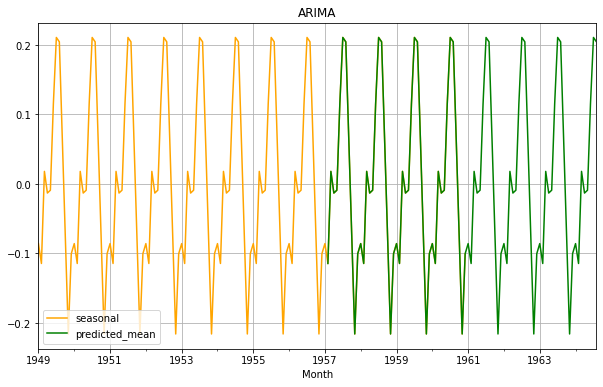

In [ ]:
arima_pred=model.predict(start=int(seasonality_log[:'1957-01'].shape[0]),end="1964-08-01",dynamic=True)

fig, ax = plt.subplots(figsize=(10, 6))
seasonality_log.plot(ax=ax, color='orange', legend=True)
arima_pred.plot(ax=ax, color='g', legend=True)
plt.grid()
plt.title("ARIMA")
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 6))
# Y_train_air.plot(ax=ax, color='b', legend=False)
# Y_test_air.plot(ax=ax, color='orange', legend=False)
# arima_pred.plot(ax=ax, color='g', legend=False)
# plt.grid()
# plt.title("ARIMA")
# plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


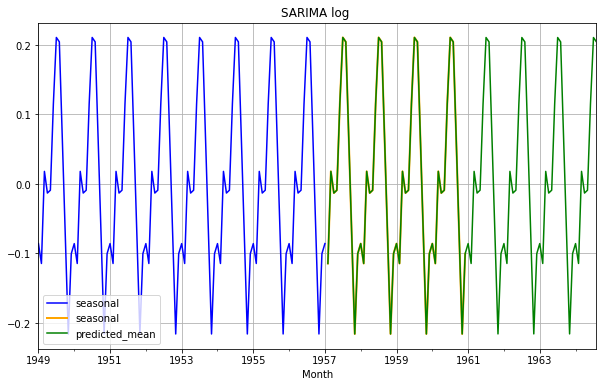

In [ ]:
###############################
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(seasonality_log[:'1957-01'],order=(1, 0, 1),seasonal_order=(1,0,1,12)).fit()
results=model.predict(start=int(seasonality_log[:'1957-01'].shape[0]),end="1964-08-01",dynamic=True)

fig, ax = plt.subplots(figsize=(10, 6))
seasonality_log[:'1957-01'].plot(ax=ax, color='b', legend=True)
seasonality_log['1957-02':].plot(ax=ax, color='orange', linewidth=2, legend=True)
results.plot(ax=ax, color='g', legend=True)
plt.grid()
plt.legend()
plt.title("SARIMA log ")
plt.show()



# Находим значение парматетра d - порядок интегрированного ряда (порядок разности временного ряда). Полученный ряд должен быть стационарным (тест Дики-Фуллера)


1. ADF :  -2.8292668241700056
2. P-Value :  0.054213290283824704
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


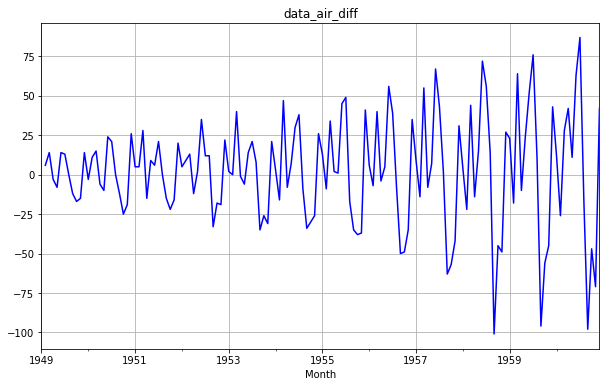

In [ ]:
###################
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
### проверим порядок d = 1, он подходит
data_air_diff = data_air.diff()
################
dftest = adfuller(data_air_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

fig, ax = plt.subplots(figsize=(10, 6))
data_air_diff.plot(ax=ax, color='b', legend=False)
plt.grid()
plt.title("data_air_diff")
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


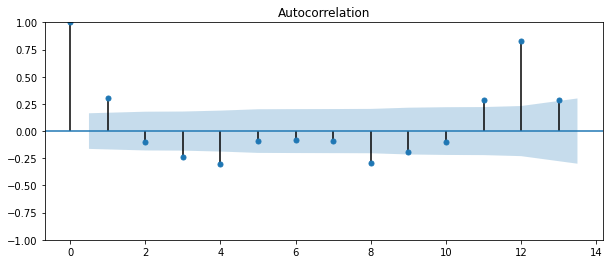

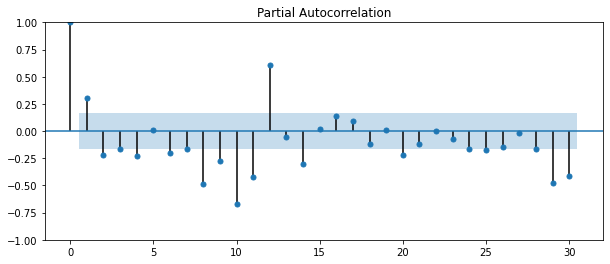

In [ ]:
plot_acf(data_air_diff.dropna(),lags=13)
plot_pacf(data_air_diff.dropna(),lags=30)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


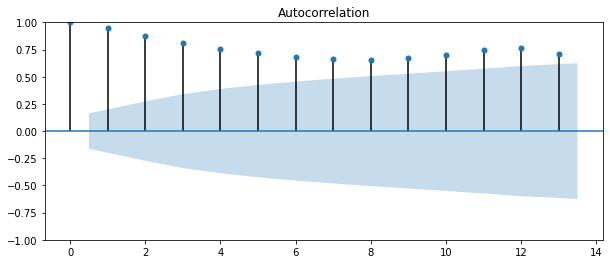

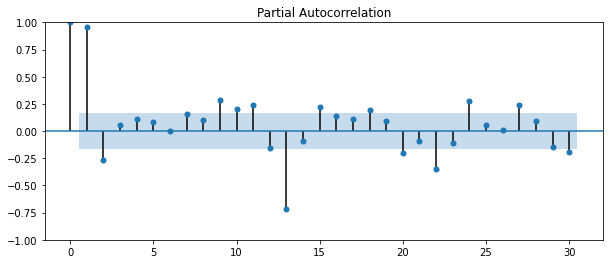

In [ ]:
plot_acf(data_air.dropna(),lags=13)
plot_pacf(data_air.dropna(),lags=30)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_diff(data,p=0,d=0,q=0, P=1,D=1,Q=1,S=12): # 0.912248660671167 0.038369498316289795 P=1,D=1,Q=1 ,p=0 , d=0 ,q=0 //////////// p=1,d=1,q=0,P=1,D=1,Q=0,S=12   0.7864175794887578 0.04568533326092732
  model=ARIMA(data[:'1957-01'], 
              order=(p,d,q), 
              seasonal_order=(P, D, Q, S),
              ).fit()
  print(model.summary())

  results=model.predict(start=int(data[:'1957-01'].shape[0]),end="1964-08-01",dynamic=True)
  fig, ax = plt.subplots(figsize=(10, 6))
  data[:'1957-01'].plot(ax=ax, color='g', legend=True)
  data['1957-01':].plot(ax=ax, color='orange', legend=True)
  results.plot(ax=ax, color='r', legend=True)
  plt.grid()
  plt.title("ARIMA")
  plt.show()
  print(r2_score(results[:'1960-12'], data['1957-02':]), mean_absolute_percentage_error(results[:'1960-12'], data['1957-02':]))
  return(results)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:               Passengers   No. Observations:                   97
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                -374.243
Date:                  Fri, 20 Jan 2023   AIC                            754.485
Time:                          09:49:00   BIC                            761.813
Sample:                      01-01-1949   HQIC                           757.433
                           - 01-01-1957                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9879      0.029     34.403      0.000       0.932       1.044
ma.S.L12      -0.7351      0.246     -2.984      0.003      -1.218      -0.252
sigma2       299.0164     85.704    

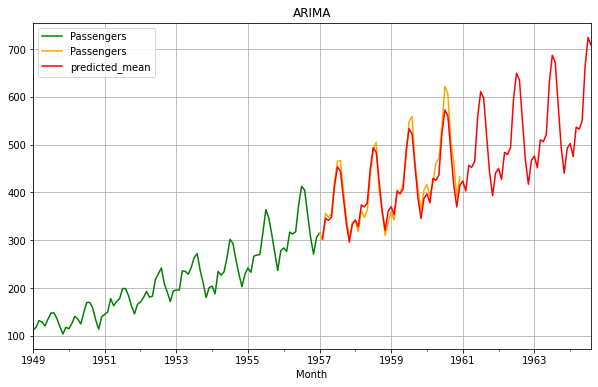

0.912248660671167 0.038369498316289795


In [ ]:
_ = ARIMA_diff(data_air)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                       Passengers   No. Observations:                   97
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -314.909
Date:                          Fri, 20 Jan 2023   AIC                            639.817
Time:                                  09:49:01   BIC                            651.972
Sample:                              01-01-1949   HQIC                           644.703
                                   - 01-01-1957                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2287      0.105     -2.170      0.030      -0.435      -0.022
ma.L1         -0.9999     15.777     -0.063      0.

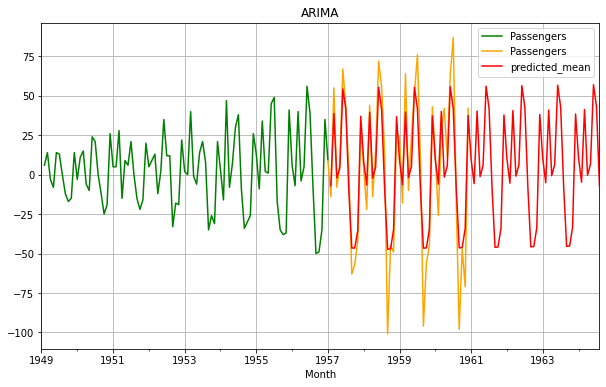

0.6247858606303502 1.6357769223055485


In [ ]:
results = ARIMA_diff(data_air_diff, p=1,d=1,q=1, P=1,D=1,Q=1)

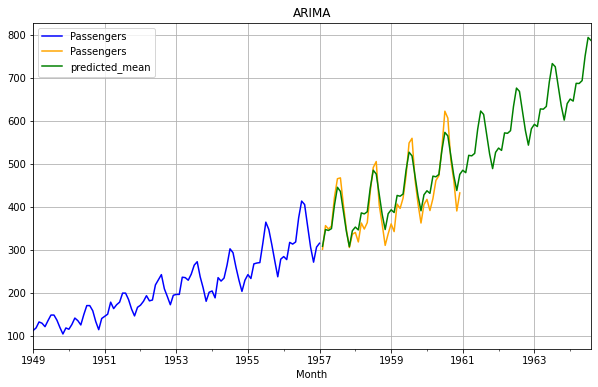

0.8316293845314335 0.05199605356162589


In [ ]:
predictions_ARIMA_diff_cumsum = results.cumsum() + data_air[:'1957-01'].iloc[-1][0]
####
fig, ax = plt.subplots(figsize=(10, 6))
data_air[:'1957-01'].plot(ax=ax, color='b', legend=True)
data_air['1957-02':].plot(ax=ax, color='orange', legend=True)
predictions_ARIMA_diff_cumsum.plot(ax=ax, color='g', legend=True)
plt.grid()
plt.legend()
plt.title("ARIMA")
plt.show()

print(r2_score(predictions_ARIMA_diff_cumsum[:'1960-12'], data_air['1957-02':]), mean_absolute_percentage_error(predictions_ARIMA_diff_cumsum[:'1960-12'], data_air['1957-02':]))

# SARIMAX VS SARIMAX + LOG 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


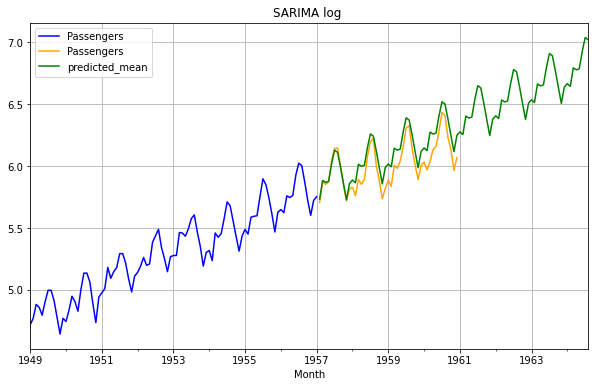

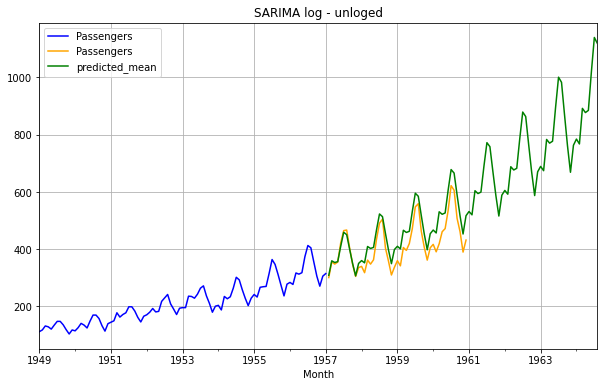

0.6775059246881283 0.015226481703417005
UN LOG 0.6965592121804272 0.08794895543015152


In [ ]:
#### SARIMAX log
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_air_log[:'1957-01'],order=(1, 1, 1),seasonal_order=(1,1,1,12)).fit()
results=model.predict(start=int(data_air_log[:'1957-01'].shape[0]),end="1964-08-01",dynamic=True)

fig, ax = plt.subplots(figsize=(10, 6))
data_air_log[:'1957-01'].plot(ax=ax, color='b', legend=True)
data_air_log['1957-02':].plot(ax=ax, color='orange', legend=True)
results.plot(ax=ax, color='g', legend=True)
plt.grid()
plt.legend()
plt.title("SARIMA log ")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
np.exp(data_air_log[:'1957-01']).plot(ax=ax, color='b', legend=True)
np.exp(data_air_log['1957-02':]).plot(ax=ax, color='orange', legend=True)
np.exp(results).plot(ax=ax, color='g', legend=True)
plt.grid()
plt.legend()
plt.title("SARIMA log - unloged")
plt.show()



print(r2_score(results[:'1960-12'], data_air_log['1957-02':]), mean_absolute_percentage_error(results[:'1960-12'], data_air_log['1957-02':]))
print('UN LOG',r2_score(np.exp(results[:'1960-12']), np.exp(data_air_log['1957-02':])), mean_absolute_percentage_error(np.exp(results[:'1960-12']), np.exp(data_air_log['1957-02':])))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


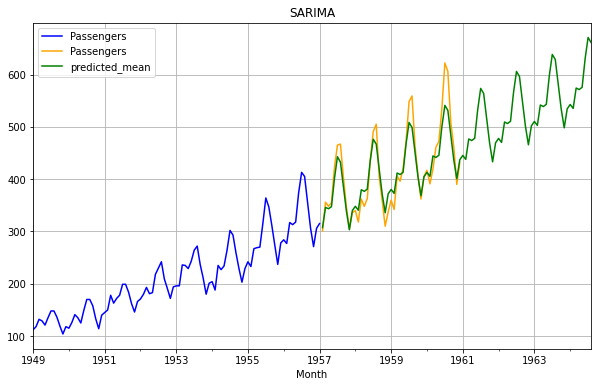

(0.7873603287057709, 0.0454485332505597)

In [ ]:
#### SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_air[:'1957-01'],order=(1, 1, 1),seasonal_order=(1,1,1,12)).fit()
results=model.predict(start=int(data_air[:'1957-01'].shape[0]),end="1964-08-01",dynamic=True)

fig, ax = plt.subplots(figsize=(10, 6))
data_air[:'1957-01'].plot(ax=ax, color='b', legend=True)
data_air['1957-02':].plot(ax=ax, color='orange', legend=True)
results.plot(ax=ax, color='g', legend=True)
plt.grid()
plt.legend()
plt.title("SARIMA")
plt.show()

r2_score(results[:'1960-12'], data_air['1957-02':]), mean_absolute_percentage_error(results[:'1960-12'], data_air['1957-02':])

# Примените авторегрессионную модель, **max 15 баллов.**


1) ARIMA, **5 б.**

In [ ]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# train for air passengers dataset
arima = pm.auto_arima(Y_train_air_scale.values, m=season_air, trace=1)

preds_arima_air = arima.predict(Y_test_air_scale.shape[0])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=-423.655, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-421.431, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-427.686, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-427.007, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-425.388, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-425.846, Time=0.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-425.774, Time=0.79 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-427.094, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-423.979, Time=0.74 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-425.376, Time=0.28 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-425.791, Time=0.54 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-426.108, Time=0.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-427.577, Time=0.43 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-423.704, Time=1.84 sec
 ARIMA(1,1,0)(1,1,0

In [ ]:
preds_arima_air_scale = pd.DataFrame(preds_arima_air, index=Y_test_air.index, columns=Y_test_air.columns)

In [ ]:
# вернем данные в исходную систему координат
preds_arima_air = pd.DataFrame(scaler_air.inverse_transform(preds_arima_air_scale), index=Y_test_air.index, columns=Y_test_air.columns)

In [ ]:
r2_score(preds_arima_air, Y_test_air), mean_absolute_percentage_error(preds_arima_air, Y_test_air)

(0.7865879545385773, 0.045701368678950124)

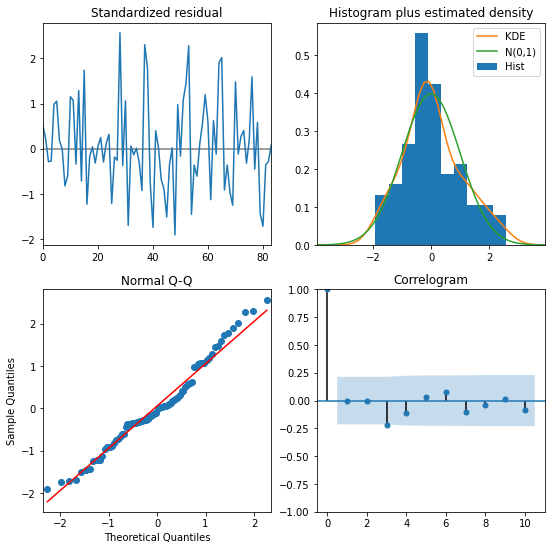

In [ ]:
arima.plot_diagnostics(figsize=(9,9))
plt.show()

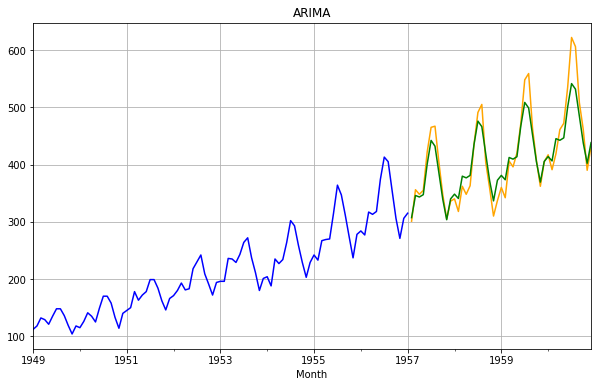

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_air.plot(ax=ax, color='b', legend=False)
Y_test_air.plot(ax=ax, color='orange', legend=False)
preds_arima_air.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("ARIMA")
plt.show()

In [ ]:
X_train_ett = data_ett[:'2017-12-31 23:00:00'].index
Y_train_ett = data_ett.loc[:'2017-12-31 23:00:00', ['OT']]

X_test_ett = data_ett['2018-01-01 00:00:00':].index

In [ ]:
# train for ett dataset
# для ускорения времени расчета и во избежание проблем с недостатком ОЗУ уменьшаем значения максимальных и минимальных возможных параметров
arima = pm.auto_arima(y=Y_train_ett_scale, m=12, trace=1, X=data_ett.loc[:'2017-12-31 23:00:00'].drop(columns=['OT']),
                      start_p=0, start_d=0, start_q=0, max_p=1, max_d=1, max_q=1,
                      seasonal=False, 
                      #start_P=1, start_D=0, start_Q=1, max_P=1, max_D=1, max_Q=1
                      )



/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-66075.636, Time=5.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-66080.030, Time=11.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-66080.028, Time=13.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-66077.579, Time=7.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-66078.026, Time=15.87 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-66081.978, Time=9.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-66079.972, Time=12.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-66081.974, Time=9.60 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 84.893 seconds


ValueError: ignored

In [ ]:
preds_arima_ett = arima.predict(Y_test_ett_scale.shape[0],X = data_ett['2018-01-01 00:00:00':].drop(columns=['OT']))
preds_arima_ett_scale = pd.DataFrame(preds_arima_ett, index=Y_test_ett.index, columns=Y_test_ett.columns)

In [ ]:
# вернем данные в исходную систему координат
preds_arima_ett = pd.DataFrame(scaler_ett.inverse_transform(preds_arima_ett_scale), index=Y_test_ett.index, columns=Y_test_ett.columns)

In [ ]:
r2_score(preds_arima_ett, Y_test_ett), mean_absolute_percentage_error(preds_arima_ett, Y_test_ett)

(-247.79897471604727, 0.8146561265224967)

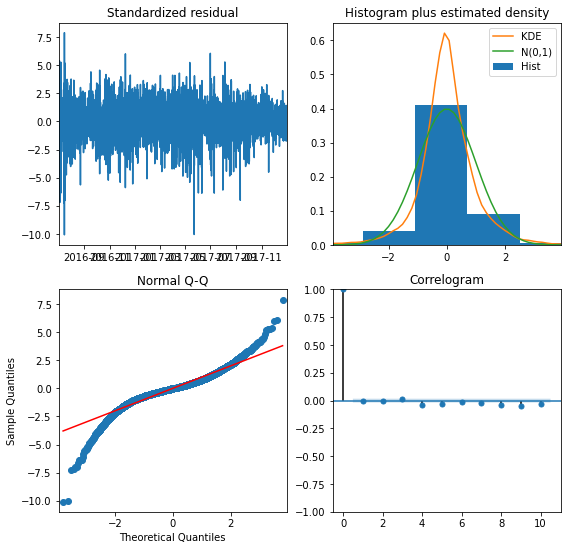

In [ ]:
arima.plot_diagnostics(figsize=(9,9))
plt.show()

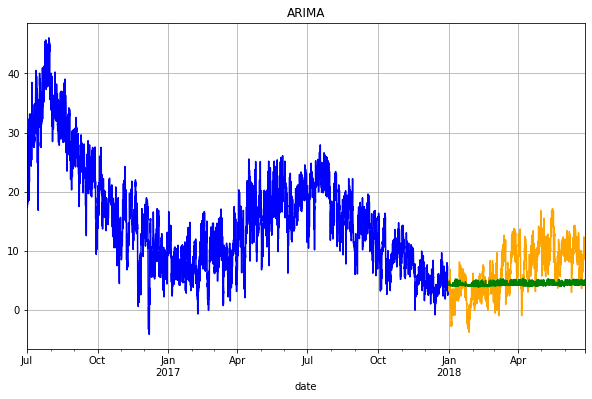

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_ett.plot(ax=ax, color='b', legend=False)
Y_test_ett.plot(ax=ax, color='orange', legend=False)
preds_arima_ett.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("ARIMA")
plt.show()

2) Holt-Winters, **5 б.**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# train for air passengers dataset

exp_smooth = ExponentialSmoothing(Y_train_air_scale,
                                     trend="add",        
                                     seasonal="add",  
                                     seasonal_periods=season_air)

exp_smooth_fitted = exp_smooth.fit()

In [ ]:
preds_exp_air_scale = exp_smooth_fitted.forecast(steps=Y_test_air_scale.shape[0]).to_frame()
preds_exp_air_scale.columns = Y_test_air_scale.columns

In [ ]:
# вернем данные в исходную систему координат
preds_exp_air = pd.DataFrame(scaler_air.inverse_transform(preds_exp_air_scale), index=Y_test_air.index, columns=Y_test_air.columns)

In [ ]:
r2_score(preds_exp_air, Y_test_air), mean_absolute_percentage_error(preds_exp_air, Y_test_air)

(0.6154956226363814, 0.055866121252151554)

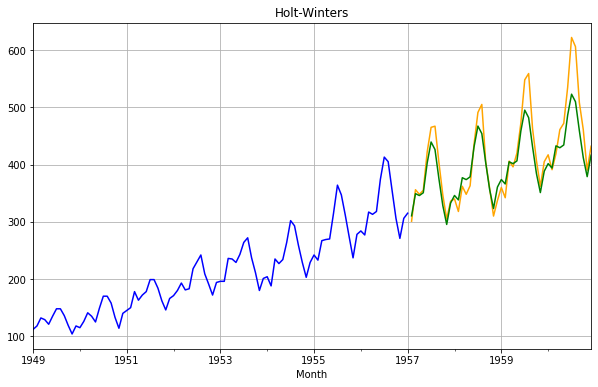

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_air.plot(ax=ax, color='b', legend=False)
Y_test_air.plot(ax=ax, color='orange', legend=False)
preds_exp_air.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("Holt-Winters")
plt.show()

In [ ]:
# train for ett dataset

exp_smooth = ExponentialSmoothing(Y_train_ett_scale,
                                     trend="add",        
                                     seasonal="add",  
                                     seasonal_periods=season_ett)

exp_smooth_fitted = exp_smooth.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [ ]:
preds_exp_ett_scale = exp_smooth_fitted.forecast(steps=Y_test_ett_scale.shape[0]).to_frame()
preds_exp_ett_scale.columns = Y_test_ett_scale.columns

In [ ]:
# вернем данные в исходную систему координат
preds_exp_ett = pd.DataFrame(scaler_ett.inverse_transform(preds_exp_ett_scale), index=Y_test_ett.index, columns=Y_test_ett.columns)

In [ ]:
r2_score(preds_exp_ett, Y_test_ett), mean_absolute_percentage_error(preds_exp_ett, Y_test_ett)

(-11.073395252733091, 23.738456729213507)

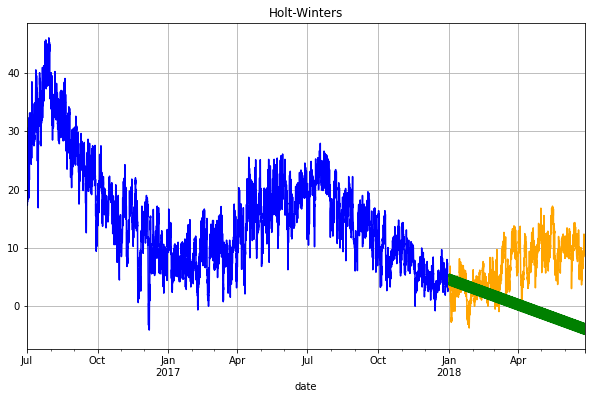

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_ett.plot(ax=ax, color='b', legend=False)
Y_test_ett.plot(ax=ax, color='orange', legend=False)
preds_exp_ett.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("Holt-Winters")
plt.show()

# Используйте RNN: LSTM и GRU, **20 б.**
Подсказка: чтобы сделать модель более сложной, вы можете добавить слой RNN «поверх» предыдущего.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, RepeatVector

In [ ]:
def create_dataset(dataset, look_back=1):
    '''
    dataset - [N,1] np.ndarray
    look_back - number of points from the past used to predict the next point
    '''
    X, Y = [], []
    for i in range(len(dataset)-look_back + 1):
        a = dataset[i:(i + look_back - 1), 0]
        X.append(a)
        Y.append(dataset[i + look_back - 1, 0])
    return np.array(X), np.array(Y)

In [ ]:
# train for air passengers dataset

In [ ]:
window_size = 12 # размер окна: window_size - 1 временных точек используются для прогноза одной

In [ ]:
trainX, trainY = create_dataset(Y_train_air_scale.values, window_size)
trainX = np.reshape(trainX, (*trainX.shape, 1))

# чтобы прогноз был для всего тестового периода и не было пропусков, придется залезть в Train на (window_size - 1) шагов для прогноза первых (window_size - 1) из Test
testX, testY = create_dataset(np.concatenate([Y_train_air_scale.values[-(window_size - 1):], Y_test_air_scale.values]), window_size)
testX = np.reshape(testX, (*testX.shape, 1))

trainX.shape, testX.shape

((86, 11, 1), (47, 11, 1))

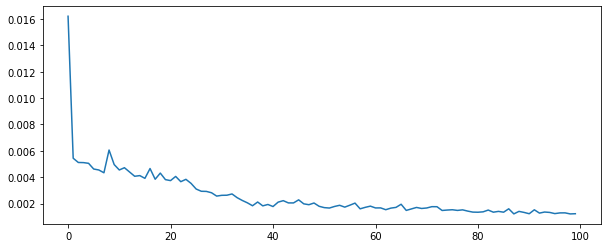

In [ ]:
# тренируем модель для авиапассажиров
model = Sequential()
model.add(LSTM(40, input_shape=(window_size - 1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=0)
plt.plot(history.history['loss'])

In [ ]:
%%time
preds_rnn_air_scale = model.predict(testX)

2/2 [==============================] - 1s 9ms/step
CPU times: user 703 ms, sys: 10.3 ms, total: 713 ms
Wall time: 931 ms


In [ ]:
preds_rnn_air_scale = pd.DataFrame(preds_rnn_air_scale, index=Y_test_air.index, columns=Y_test_air.columns)

In [ ]:
# вернем данные в исходную систему координат
preds_rnn_air = pd.DataFrame(scaler_air.inverse_transform(preds_rnn_air_scale), index=preds_rnn_air_scale.index, columns=preds_rnn_air_scale.columns)

In [ ]:
r2_score(preds_rnn_air, Y_test_air), mean_absolute_percentage_error(preds_rnn_air, Y_test_air)

(0.6470093632852723, 0.07794325524496888)

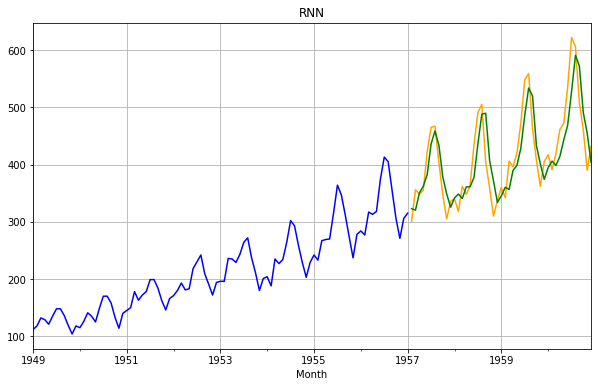

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_air.plot(ax=ax, color='b', legend=False)
Y_test_air.plot(ax=ax, color='orange', legend=False)
preds_rnn_air.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("RNN")
plt.show()

## Autoencoder

CPU times: user 23.4 s, sys: 1.08 s, total: 24.5 s
Wall time: 16.5 s


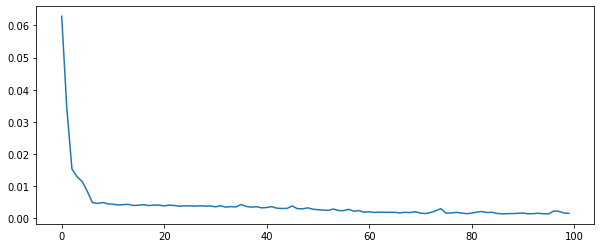

In [ ]:
%%time
model = Sequential()
model.add(LSTM(11, activation="relu", input_shape=(11, 1)))
model.add(RepeatVector(11))
model.add(LSTM(11, activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100
                    , batch_size=5, verbose=0)

plt.plot(history.history['loss'])


In [ ]:
%%time
preds_rnn_air_scale = model.predict(testX)

2/2 [==============================] - 0s 7ms/step
CPU times: user 293 ms, sys: 8.67 ms, total: 302 ms
Wall time: 301 ms


In [ ]:
preds_rnn_air_scale = pd.DataFrame(preds_rnn_air_scale, index=Y_test_air.index, columns=Y_test_air.columns)
# вернем данные в исходную систему координат
preds_rnn_air = pd.DataFrame(scaler_air.inverse_transform(preds_rnn_air_scale), index=preds_rnn_air_scale.index, columns=preds_rnn_air_scale.columns)

In [ ]:
r2_score(preds_rnn, testY), mean_absolute_percentage_error(preds_rnn, testY)

(-1.0563748669442625, 0.14964650347103337)

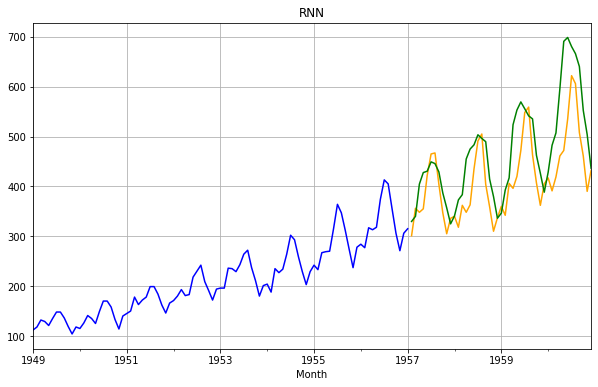

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_air.plot(ax=ax, color='b', legend=False)
Y_test_air.plot(ax=ax, color='orange', legend=False)
preds_rnn_air.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("RNN")
plt.show()

# train for ett dataset 

## (without exogeneous parameters)

In [ ]:
window_size = 24 # размер окна: window_size - 1 временных точек используются для прогноза одной

In [ ]:
trainX, trainY = create_dataset(Y_train_ett_scale.values, window_size)
trainX = np.reshape(trainX, (*trainX.shape, 1))

# чтобы прогноз был для всего тестового периода и не было пропусков, придется залезть в Train на (window_size - 1) шагов для прогноза первых (window_size - 1) из Test
testX, testY = create_dataset(np.concatenate([Y_train_ett_scale.values[-(window_size - 1):], Y_test_ett_scale.values]), window_size)
testX = np.reshape(testX, (*testX.shape, 1))

trainX.shape, testX.shape

NameError: ignored

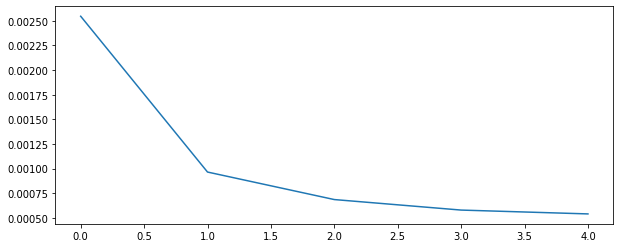

In [ ]:
# тренируем модель для набора данных ett
model = Sequential()
model.add(LSTM(40, input_shape=(window_size - 1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs=5, batch_size=32, verbose=0)
plt.plot(history.history['loss'])

In [ ]:
%%time
preds_rnn_ett_scale = model.predict(testX)

133/133 [==============================] - 1s 3ms/step
CPU times: user 1.02 s, sys: 39 ms, total: 1.06 s
Wall time: 1 s


In [ ]:
preds_rnn_ett_scale = pd.DataFrame(preds_rnn_ett_scale, index=Y_test_ett.index, columns=Y_test_ett.columns)

In [ ]:
# вернем данные в исходную систему координат
preds_rnn_ett = pd.DataFrame(scaler_ett.inverse_transform(preds_rnn_ett_scale), index=preds_rnn_ett_scale.index, columns=preds_rnn_ett_scale.columns)

In [ ]:
r2_score(preds_rnn_ett, Y_test_ett), mean_absolute_percentage_error(preds_rnn_ett, Y_test_ett)

(0.9597869100047968, 0.28600726027692597)

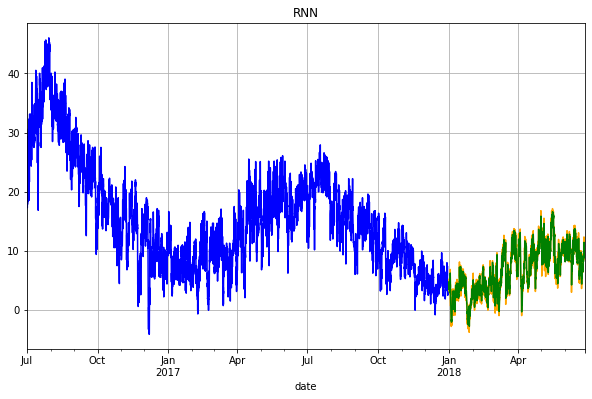

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_ett.plot(ax=ax, color='b', legend=False)
Y_test_ett.plot(ax=ax, color='orange', legend=False)
preds_rnn_ett.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("RNN")
plt.show()

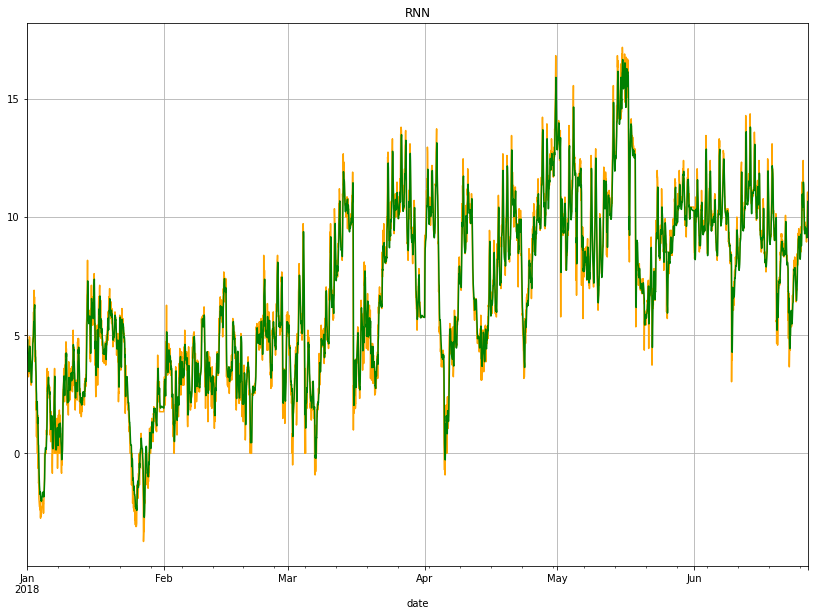

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
Y_test_ett.plot(ax=ax, color='orange', legend=False)
preds_rnn_ett.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("RNN")
plt.show()

## (with exogeneous parameters)

In [ ]:
window_size = 24 # размер окна: window_size - 1 временных точек используются для прогноза одной

In [ ]:
def create_dataset_exog(dataset, look_back=1):
    '''
    dataset - [N,1] np.ndarray
    look_back - number of points from the past used to predict the next point
    '''
    X, Y = [], []
    for i in range(len(dataset)-look_back + 1):
        a = dataset[i:(i + look_back - 1), :-1]
        X.append(a)
        Y.append(dataset[i + look_back - 1, -1])
    return np.array(X), np.array(Y)

In [ ]:
Y_scale = pd.concat([Y_train_ett_scale, Y_test_ett_scale])
data_ett_scale = data_ett.drop(["OT"], axis=1).merge(Y_scale, left_index=True, right_index=True)

In [ ]:
trainX, trainY = create_dataset_exog(data_ett_scale.loc[:'2017-12-31 23:00:00'].values, window_size)
# trainX = np.reshape(trainX, (*trainX.shape, 1))

# чтобы прогноз был для всего тестового периода и не было пропусков, придется залезть в Train на (window_size - 1) шагов для прогноза первых (window_size - 1) из Test
testX, testY = create_dataset_exog(np.concatenate([data_ett_scale.loc[:'2017-12-31 23:00:00'].values[-(window_size - 1):], data_ett_scale['2018-01-01 00:00:00':].values]), window_size)
# testX = np.reshape(testX, (*testX.shape, 1))

trainX.shape, testX.shape

((13153, 23, 6), (4244, 23, 6))

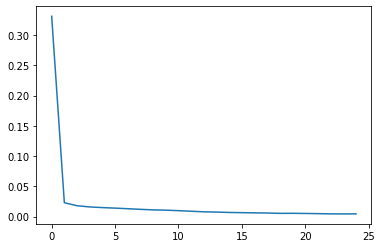

In [ ]:
# тренируем модель для набора данных ett
model = Sequential()
model.add(LSTM(23, return_sequences = True, input_shape=((window_size - 1), 6)))
model.add(Dropout(0.1))
model.add(LSTM(units = 23, return_sequences = False))
model.add(Dropout(0.1))
# model.add(LSTM(units = 40, return_sequences = False))
# model.add(Dropout(0.2))
# model.add(RepeatVector(40))
# model.add(LSTM(40, return_sequences = False, activation="relu"))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs=25, batch_size=32, verbose=0)
plt.plot(history.history['loss'])

In [1]:
%%time
preds_rnn_ett_scale = model.predict(testX)

NameError: ignored

In [ ]:
preds_rnn_ett_scale.shape

(4244, 1)

In [ ]:
preds_rnn_ett_scale = pd.DataFrame(preds_rnn_ett_scale, index=Y_test_ett.index, columns=Y_test_ett.columns)
# # вернем данные в исходную систему координат
preds_rnn_ett = pd.DataFrame(scaler_ett.inverse_transform(preds_rnn_ett_scale), index=preds_rnn_ett_scale.index, columns=preds_rnn_ett_scale.columns)
r2_score(preds_rnn_ett, Y_test_ett), mean_absolute_percentage_error(preds_rnn_ett, Y_test_ett)

(-1.1314937635163322, 0.49089291195304635)

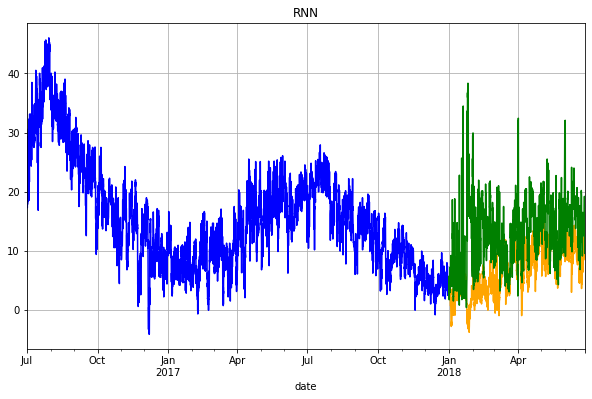

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
Y_train_ett.plot(ax=ax, color='b', legend=False)
Y_test_ett.plot(ax=ax, color='orange', legend=False)
preds_rnn_ett.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("RNN")
plt.show()

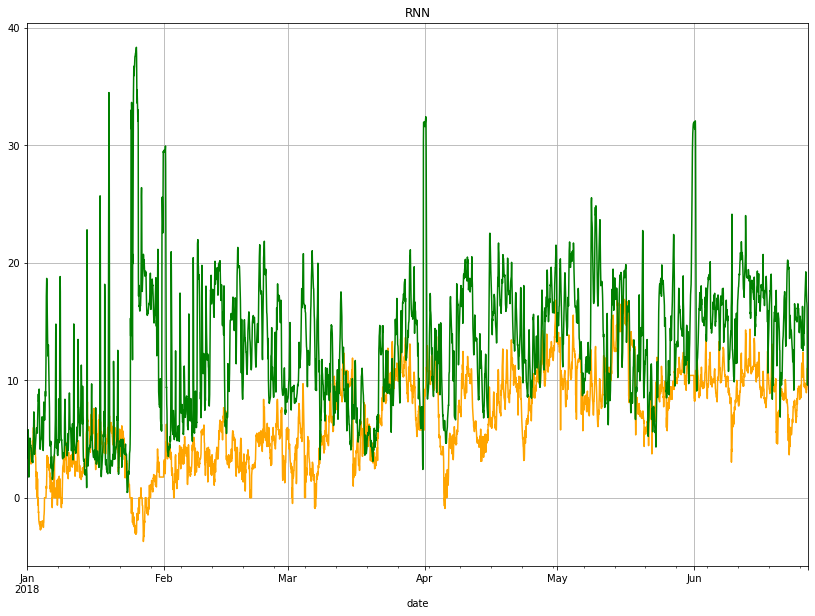

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
Y_test_ett.plot(ax=ax, color='orange', legend=False)
preds_rnn_ett.plot(ax=ax, color='g', legend=False)
plt.grid()
plt.title("RNN")
plt.show()

# Сделайте выводы, **3 б.**

Выводы для авиапассажиров. 
1) ARIMA показала наилучшие результаты по метрике, но визуально видно, что эта модель не смогла уловить возрастающую с каждым годом амплитуду числа пассажиров в течение одного года.
2) Модель Холта-Винтерса так же не смогла этого уловить, а по обеим метрикам уступает ARIMA.
3) Нейронная сеть на основе одного LSTM слоя показала неплохие метрики (R2 немного уступает ARIMA, но лучше чем Холт-Винтерс, MAPE у LSTM чуть уступает обеим моделям), но в отличие от предыдущих двух LSTM смогла "увидеть" возрастающую годовую амплитуду и в целом визуально, выглядет лучше.

Выводы для данных ett.
Модели ARIMA и Холта-Винтерса не смогли адекватно спрогнозировать тестовый период, т.к. не "видят" годовую сезонность (к тому же модель Холта-Винтерса требует, чтобы прошло не менее двух периодов сезонности, чего нет в этих данных. Тем не менее, нейронная сеть отлично справилась с прогнозом, показав неплохие метрики.